# Pylops - Adaptive Subtraction

### Author: M.Ravasi

This notebook showcases the use of `pylops.utils.signalprocessing.convmtx` to perform adaptive subtraction

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pylops

from scipy.signal import convolve, correlate, fftconvolve, oaconvolve
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.signalprocessing     import convmtx
from pylops.basicoperators             import *
from pylops.signalprocessing           import *

from pylops.optimization.basic import lsqr

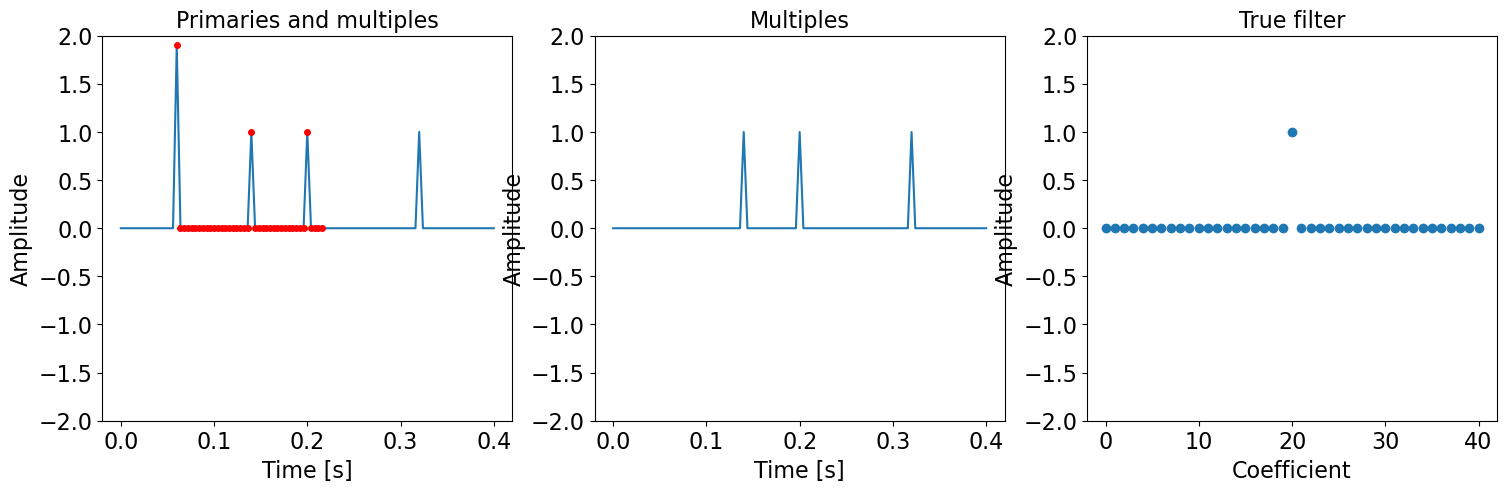

In [2]:
nt = 101
nfilt = 41
t = np.linspace(0, 0.4, nt)
data = np.zeros(nt)
data[np.argwhere(t == 0.06)] = 1.9
data[np.argwhere(t == 0.14)] = 1
data[np.argwhere(t == 0.20)] = 1
data[np.argwhere(t == 0.32)] = 1
multiples = data.copy()
multiples[np.argwhere(t == 0.06)] = 0
idx = np.argwhere(t == 0.14)[0][0]
mark = [i for i in range(idx-nfilt//2, idx+nfilt//2)]
filt_true = np.zeros(nfilt)
filt_true[nfilt//2] = 1
# plt.plot(vals,poly,markevery=mark, ls="", marker="o", label="points")

# Plot the data and the multiples
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].plot(t, data, markevery=mark, marker="o", label="points", ms=4, markerfacecolor='r', markeredgecolor='r')
# axs[0].plot(t, data, '')
axs[0].set_ylim(-2,2);
axs[0].set_ylabel('Amplitude', fontsize=16)
axs[0].set_xlabel('Time [s]', fontsize=16);
axs[0].set_title('Primaries and multiples', fontsize=16)
axs[1].plot(t, multiples)
axs[1].set_ylim(-2,2);
axs[1].set_ylabel('Amplitude', fontsize=16)
axs[1].set_xlabel('Time [s]', fontsize=16);
axs[1].set_title('Multiples', fontsize=16);
axs[2].plot(filt_true, 'o')
axs[2].set_ylim(-2,2);
axs[2].set_ylabel('Amplitude', fontsize=16)
axs[2].set_title('True filter', fontsize=16);
axs[2].set_xlabel('Coefficient', fontsize=16);

/Users/ravasim/Desktop/KAUST/OpenSource/pylops/pylops/utils/signalprocessing.py:45: FutureWarning: A new implementation of convmtx is provided in v2.2.0 to match MATLAB's convmtx method as stated in the docstring. Prior to v2.2.0,The implementation of convmtx provided prior to v2.2.0 was instead not consistent with the documentation. Users are highly encouraged to modify their codes accordingly.
  warnings.warn(


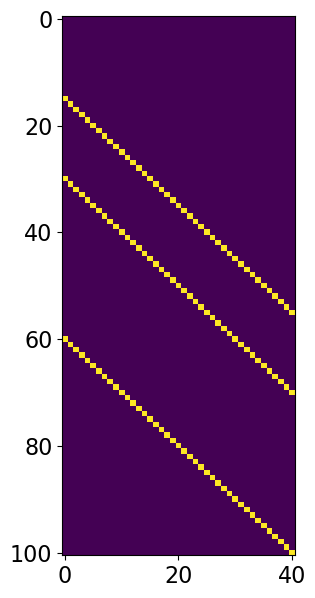

In [3]:
C = pylops.utils.signalprocessing.convmtx(multiples, nfilt, nfilt//2)
C = C[:nt] # trim to match size of data
Cop = pylops.basicoperators.MatrixMult(C) # convert to pylops Linear Operator

fig, axs = plt.subplots(1, 1, figsize=(3,7))
axs.imshow(C, aspect='auto');

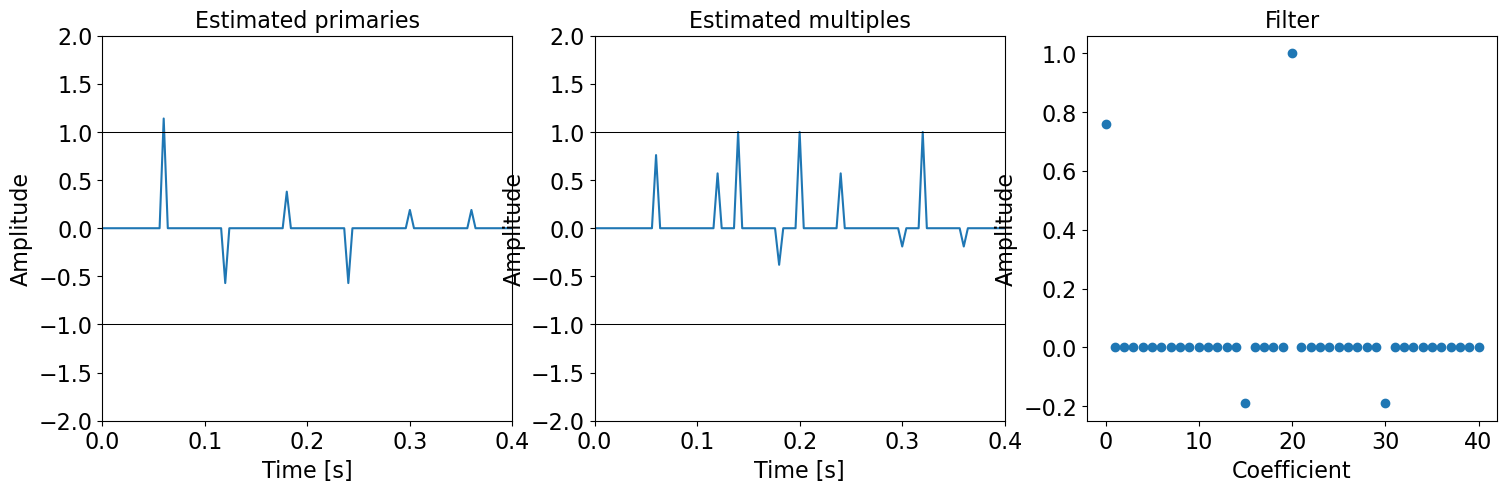

In [4]:
filt = lsqr(Cop, data, x0=np.zeros(nfilt), niter=25)[0]
multiple_est = np.dot(C, filt)
primary_est = data - multiple_est

# Plot the estimated primary and the estimated multiples after adaptive subtraction
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].plot(t, primary_est)
axs[0].set_ylim(-2,2);
axs[0].set_ylabel('Amplitude', fontsize=16)
axs[0].set_xlabel('Time [s]', fontsize=16);
axs[0].set_title('Estimated primaries', fontsize=16)
axs[0].set_xlim(0, 0.4)
axs[0].axhline(y=1, color='k', linewidth=0.75)
axs[0].axhline(y=-1, color='k', linewidth=0.75)
axs[1].plot(t, multiple_est)
axs[1].axhline(y=1, color='k', linewidth=0.75)
axs[1].axhline(y=-1, color='k', linewidth=0.75)
axs[1].set_ylim(-2,2);
axs[1].set_ylabel('Amplitude', fontsize=16)
axs[1].set_xlabel('Time [s]', fontsize=16);
axs[1].set_title('Estimated multiples', fontsize=16);
axs[1].set_xlim(0, 0.4);
axs[2].plot(filt,'o')
axs[2].set_ylabel('Amplitude', fontsize=16)
axs[2].set_title('Filter', fontsize=16);
axs[2].set_xlabel('Coefficient', fontsize=16);

In [ ]:
filt = lsqr(Cop, data, x0=np.zeros(nfilt), niter=25)[0]
multiple_est = np.dot(C, filt)
primary_est = data - multiple_est

# Plot the estimated primary and the estimated multiples after adaptive subtraction
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].plot(t, primary_est)
axs[0].set_ylim(-2,2);
axs[0].set_ylabel('Amplitude', fontsize=16)
axs[0].set_xlabel('Time [s]', fontsize=16);
axs[0].set_title('Estimated primaries', fontsize=16)
axs[0].set_xlim(0, 0.4)
axs[0].axhline(y=1, color='k', linewidth=0.75)
axs[0].axhline(y=-1, color='k', linewidth=0.75)
axs[1].plot(t, multiple_est)
axs[1].axhline(y=1, color='k', linewidth=0.75)
axs[1].axhline(y=-1, color='k', linewidth=0.75)
axs[1].set_ylim(-2,2);
axs[1].set_ylabel('Amplitude', fontsize=16)
axs[1].set_xlabel('Time [s]', fontsize=16);
axs[1].set_title('Estimated multiples', fontsize=16);
axs[1].set_xlim(0, 0.4);
axs[2].plot(filt,'o')
axs[2].set_ylabel('Amplitude', fontsize=16)
axs[2].set_title('Filter', fontsize=16);
axs[2].set_xlabel('Coefficient', fontsize=16);